In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

In [4]:
df = pd.read_csv('l13_10_course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [5]:
# Get dataframe with all records from control group
control_df = df.query('group == "control"')

# Compute click through rate for control group
control_ctr = control_df.query('action == "enroll"').count()[0] / control_df.query('action == "view"').count()[0]

# Display click through rate
control_ctr

0.23452157598499063

In [6]:
# Get dataframe with all records from experiment group
experiment_df = df.query('group == "experiment"')

# Compute click through rate for experiment group
experiment_ctr = experiment_df.query('action == "enroll"').count()[0] / experiment_df.query('action == "view"').count()[0]

# Display click through rate
experiment_ctr


0.2642986152919928

In [7]:
# Compute the observed difference in click through rates
obs_diff =  experiment_ctr - control_ctr

# Display observed difference
obs_diff

0.02977703930700215

In [60]:
# Create a sampling distribution of the difference in proportions
# with bootstrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    
    control_ctr = control_df.query('action == "enroll"').count()[0] / control_df.query('action == "view"').count()[0]
    experiment_ctr = experiment_df.query('action == "enroll"').count()[0] / experiment_df.query('action == "view"').count()[0]
    diffs.append(experiment_ctr - control_ctr)



(array([9.000e+00, 1.240e+02, 6.720e+02, 1.924e+03, 3.037e+03, 2.569e+03,
        1.283e+03, 3.240e+02, 5.700e+01, 1.000e+00]),
 array([-0.04383067, -0.028376  , -0.01292133,  0.00253334,  0.01798801,
         0.03344268,  0.04889735,  0.06435202,  0.07980669,  0.09526136,
         0.11071603]),
 <a list of 10 Patch objects>)

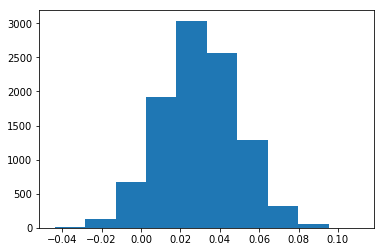

In [62]:
# Convert to numpy array
diffs = np.array(diffs)
# print(diffs)

# Plot sampling distribution
plt.hist(diffs)

In [64]:
diffs.std()

0.019494975488116267

In [65]:
diffs.size

10000

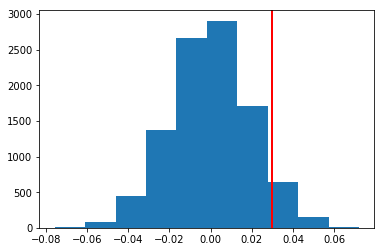

In [66]:
# Simulate distribution under the null hypothesis

null_vals = np.random.normal(0,diffs.std(),diffs.size)
# Plot the null distribution
plt.hist(null_vals)
plt.axvline(obs_diff,c='r',linewidth='2')

In [54]:
diffs.std()

0.019555353468500822

In [68]:
# Plot observed statistic with the null distibution


(null_vals > obs_diff).mean()

0.067

In [49]:
obs_diff

0.02977703930700215

In [35]:
null_vals

array([-2.37717457e-03, -1.56526706e-02,  3.61237425e-02, -1.77922036e-02,
        3.86221236e-02,  8.58974375e-03,  1.30415565e-03,  1.64298452e-02,
       -2.56643255e-03,  1.17253658e-02, -3.76665285e-03, -1.66708907e-02,
       -4.36391518e-03, -1.42001662e-02,  4.84824602e-02,  1.90335549e-02,
       -1.33023579e-03, -3.33014317e-03,  2.45785629e-02,  2.56645608e-02,
       -2.77888848e-02, -1.25861804e-02,  2.20352544e-02, -2.94410207e-02,
        1.09867205e-02, -2.22354481e-02, -3.12212467e-02,  3.34827164e-02,
        2.74517373e-02,  1.36220166e-02, -4.27592403e-02, -3.94737770e-02,
       -1.22550719e-02,  2.35619276e-02,  1.36572834e-02, -2.15913489e-02,
        2.43019282e-02, -1.08765132e-02,  2.27382630e-02,  1.13486677e-03,
        4.52321666e-02,  1.88147750e-02, -1.57059920e-02,  3.15037390e-02,
        7.13554730e-03, -2.38547873e-02,  1.11802507e-02,  1.12079817e-02,
       -1.69865203e-02,  9.27308277e-05, -1.55618629e-02,  5.78580358e-03,
       -4.34420412e-02, -

In [36]:
# Compute p-value
